# Character Theory of Finite Groups

## Introduction

Character theory is one of the most powerful tools in the representation theory of finite groups. A **character** of a group representation encodes essential information about how the group acts on a vector space, distilling the entire representation down to a function from the group to the complex numbers.

## Theoretical Background

### Group Representations

Let $G$ be a finite group. A **linear representation** of $G$ over $\mathbb{C}$ is a group homomorphism:

$$\rho: G \to GL(V)$$

where $V$ is a finite-dimensional complex vector space and $GL(V)$ denotes the group of invertible linear transformations on $V$. The **degree** of the representation is $\dim(V)$.

### Characters

The **character** $\chi_\rho$ of a representation $\rho$ is the function:

$$\chi_\rho: G \to \mathbb{C}, \quad \chi_\rho(g) = \text{Tr}(\rho(g))$$

where $\text{Tr}$ denotes the trace of the matrix representing $\rho(g)$.

### Key Properties of Characters

1. **Class Functions**: Characters are constant on conjugacy classes. If $h = xgx^{-1}$, then:
   $$\chi(h) = \chi(xgx^{-1}) = \text{Tr}(\rho(x)\rho(g)\rho(x)^{-1}) = \text{Tr}(\rho(g)) = \chi(g)$$

2. **Identity Element**: $\chi(e) = \dim(V) = $ degree of the representation

3. **Inverse Elements**: $\chi(g^{-1}) = \overline{\chi(g)}$ for unitary representations

### Orthogonality Relations

The **first orthogonality relation** states that for irreducible characters $\chi_i$ and $\chi_j$:

$$\langle \chi_i, \chi_j \rangle = \frac{1}{|G|} \sum_{g \in G} \chi_i(g) \overline{\chi_j(g)} = \delta_{ij}$$

The **second orthogonality relation** relates character values across conjugacy classes:

$$\sum_{\chi \in \text{Irr}(G)} \chi(g) \overline{\chi(h)} = \begin{cases} |C_G(g)| & \text{if } g \sim h \\ 0 & \text{otherwise} \end{cases}$$

where $C_G(g)$ is the centralizer of $g$ and $g \sim h$ means $g$ and $h$ are conjugate.

### Character Table

The **character table** of a group $G$ is a square matrix where:
- Rows correspond to irreducible representations
- Columns correspond to conjugacy classes
- Entry $(i, j)$ is $\chi_i(g_j)$ for a representative $g_j$ of the $j$-th conjugacy class

Key facts:
- The number of irreducible representations equals the number of conjugacy classes
- $\sum_{\chi \in \text{Irr}(G)} \chi(e)^2 = |G|$ (sum of squares of degrees equals group order)

## Computational Example: Character Table of the Symmetric Group $S_3$

We will compute and visualize the character table of the symmetric group $S_3$, the group of all permutations of three elements. This group has order $|S_3| = 6$ and is isomorphic to the dihedral group $D_3$.

### Conjugacy Classes of $S_3$

The conjugacy classes are determined by cycle type:
- $C_1 = \{e\}$: the identity (cycle type $(1,1,1)$)
- $C_2 = \{(12), (13), (23)\}$: transpositions (cycle type $(2,1)$)
- $C_3 = \{(123), (132)\}$: 3-cycles (cycle type $(3)$)

Since there are 3 conjugacy classes, there are exactly 3 irreducible representations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Define S_3 as permutations of (0, 1, 2)
# We represent each permutation as a tuple showing where each element maps

def compose_perm(p1, p2):
    """Compose two permutations: p1 ∘ p2 means apply p2 first, then p1."""
    return tuple(p1[p2[i]] for i in range(len(p1)))

def inverse_perm(p):
    """Compute the inverse of a permutation."""
    n = len(p)
    inv = [0] * n
    for i, j in enumerate(p):
        inv[j] = i
    return tuple(inv)

# Generate all elements of S_3
S3 = list(permutations(range(3)))
print("Elements of S_3:")
for i, p in enumerate(S3):
    print(f"  g_{i}: {p}")
print(f"\nOrder of S_3: |S_3| = {len(S3)}")

Elements of S_3:
  g_0: (0, 1, 2)
  g_1: (0, 2, 1)
  g_2: (1, 0, 2)
  g_3: (1, 2, 0)
  g_4: (2, 0, 1)
  g_5: (2, 1, 0)

Order of S_3: |S_3| = 6


In [2]:
# Identify conjugacy classes
# Two elements are conjugate if h = g * x * g^{-1} for some g

def conjugacy_class(x, group):
    """Find the conjugacy class of element x in the group."""
    conj_class = set()
    for g in group:
        g_inv = inverse_perm(g)
        conjugate = compose_perm(compose_perm(g, x), g_inv)
        conj_class.add(conjugate)
    return conj_class

# Find all conjugacy classes
visited = set()
conjugacy_classes = []

for elem in S3:
    if elem not in visited:
        cc = conjugacy_class(elem, S3)
        conjugacy_classes.append(cc)
        visited.update(cc)

print("Conjugacy Classes of S_3:")
class_names = ['Identity', 'Transpositions', '3-cycles']
class_representatives = []
for i, cc in enumerate(conjugacy_classes):
    rep = min(cc)  # Choose a canonical representative
    class_representatives.append(rep)
    print(f"  C_{i+1} ({class_names[i]}): {cc}")
    print(f"    Representative: {rep}, Size: {len(cc)}")

Conjugacy Classes of S_3:
  C_1 (Identity): {(0, 1, 2)}
    Representative: (0, 1, 2), Size: 1
  C_2 (Transpositions): {(2, 1, 0), (0, 2, 1), (1, 0, 2)}
    Representative: (0, 2, 1), Size: 3
  C_3 (3-cycles): {(2, 0, 1), (1, 2, 0)}
    Representative: (1, 2, 0), Size: 2


## Constructing the Irreducible Representations

$S_3$ has three irreducible representations:

1. **Trivial representation** $\rho_1$: All elements map to $1$ (degree 1)
   $$\rho_1(g) = 1 \quad \forall g \in S_3$$

2. **Sign representation** $\rho_2$: Maps even permutations to $1$, odd to $-1$ (degree 1)
   $$\rho_2(g) = \text{sgn}(g) = (-1)^{\text{inversions}(g)}$$

3. **Standard representation** $\rho_3$: The 2-dimensional representation (degree 2)
   
   This is the representation on $\{(x_1, x_2, x_3) \in \mathbb{R}^3 : x_1 + x_2 + x_3 = 0\}$, the orthogonal complement of the all-ones vector.

In [3]:
def sign_of_permutation(p):
    """Compute the sign (parity) of a permutation."""
    n = len(p)
    inversions = 0
    for i in range(n):
        for j in range(i + 1, n):
            if p[i] > p[j]:
                inversions += 1
    return (-1) ** inversions

def standard_rep_matrix(p):
    """
    Compute the 2D matrix for the standard representation of S_3.
    
    We use the basis {e_1 - e_2, e_2 - e_3} for the 2D subspace
    orthogonal to (1,1,1).
    """
    # Permutation matrix in 3D
    P = np.zeros((3, 3))
    for i, j in enumerate(p):
        P[j, i] = 1
    
    # Basis vectors: v1 = e_0 - e_1, v2 = e_1 - e_2
    # We compute how P acts on these basis vectors
    e = np.eye(3)
    v1 = e[0] - e[1]  # (1, -1, 0)
    v2 = e[1] - e[2]  # (0, 1, -1)
    
    # Apply permutation
    Pv1 = P @ v1
    Pv2 = P @ v2
    
    # Express results in terms of basis {v1, v2}
    # v1 = (1, -1, 0), v2 = (0, 1, -1)
    # Any vector (a, b, c) with a+b+c=0 can be written as:
    # x*v1 + y*v2 = (x, -x+y, -y) => x=a, y=-c, verify: -x+y = -a-c = b ✓
    
    def coords_in_basis(vec):
        return np.array([vec[0], -vec[2]])
    
    col1 = coords_in_basis(Pv1)
    col2 = coords_in_basis(Pv2)
    
    return np.column_stack([col1, col2])

# Verify the representations for each element
print("Representations of S_3 elements:\n")
print(f"{'Permutation':<15} {'Trivial':<10} {'Sign':<10} {'Standard (trace)'}")
print("-" * 55)

for p in S3:
    trivial = 1
    sign = sign_of_permutation(p)
    std_matrix = standard_rep_matrix(p)
    std_trace = np.trace(std_matrix)
    print(f"{str(p):<15} {trivial:<10} {sign:<10} {std_trace:.0f}")

Representations of S_3 elements:

Permutation     Trivial    Sign       Standard (trace)
-------------------------------------------------------
(0, 1, 2)       1          1          2
(0, 2, 1)       1          -1         0
(1, 0, 2)       1          -1         0
(1, 2, 0)       1          1          -1
(2, 0, 1)       1          1          -1
(2, 1, 0)       1          -1         0


In [4]:
# Compute the character table
# Characters are constant on conjugacy classes, so we only need values at representatives

def compute_character_table(group, class_reps):
    """
    Compute the character table for S_3.
    Returns: character table as numpy array, row labels, column labels
    """
    n_classes = len(class_reps)
    table = np.zeros((n_classes, n_classes))
    
    for j, rep in enumerate(class_reps):
        # Trivial representation
        table[0, j] = 1
        
        # Sign representation
        table[1, j] = sign_of_permutation(rep)
        
        # Standard representation
        table[2, j] = np.trace(standard_rep_matrix(rep))
    
    return table

char_table = compute_character_table(S3, class_representatives)

print("Character Table of S_3")
print("=" * 50)
print(f"{'':15} {'C_1 (e)':<12} {'C_2 (12)':<12} {'C_3 (123)'}")
print(f"{'Class size:':<15} {'1':<12} {'3':<12} {'2'}")
print("-" * 50)

rep_names = ['χ_trivial', 'χ_sign', 'χ_standard']
for i, name in enumerate(rep_names):
    row = '  '.join(f"{int(char_table[i, j]):>6}" for j in range(3))
    print(f"{name:<15} {row}")

print("\n" + "=" * 50)

Character Table of S_3
                C_1 (e)      C_2 (12)     C_3 (123)
Class size:     1            3            2
--------------------------------------------------
χ_trivial            1       1       1
χ_sign               1      -1       1
χ_standard           2       0      -1



In [5]:
# Verify the orthogonality relations

print("Verification of Orthogonality Relations")
print("=" * 50)

# Class sizes
class_sizes = np.array([len(cc) for cc in conjugacy_classes])
group_order = len(S3)

print("\n1. First Orthogonality Relation:")
print("   ⟨χ_i, χ_j⟩ = (1/|G|) Σ_g χ_i(g) χ_j(g)* = δ_ij")
print()

# Inner product using class equation
def inner_product(chi1, chi2, class_sizes, group_order):
    """Compute ⟨χ_1, χ_2⟩ = (1/|G|) Σ_C |C| χ_1(g_C) χ_2(g_C)*"""
    return np.sum(class_sizes * chi1 * np.conj(chi2)) / group_order

for i in range(3):
    for j in range(3):
        ip = inner_product(char_table[i], char_table[j], class_sizes, group_order)
        expected = 1 if i == j else 0
        status = "✓" if np.abs(ip - expected) < 1e-10 else "✗"
        print(f"   ⟨{rep_names[i]}, {rep_names[j]}⟩ = {ip.real:.2f} (expected: {expected}) {status}")

print("\n2. Sum of Squares of Degrees = |G|:")
degrees = char_table[:, 0]  # χ(e) gives the degree
sum_sq = np.sum(degrees ** 2)
print(f"   Σ χ(e)² = {int(degrees[0])}² + {int(degrees[1])}² + {int(degrees[2])}² = {int(sum_sq)}")
print(f"   |S_3| = {group_order}")
print(f"   Verification: {int(sum_sq)} = {group_order} ✓" if sum_sq == group_order else "   ✗")

Verification of Orthogonality Relations

1. First Orthogonality Relation:
   ⟨χ_i, χ_j⟩ = (1/|G|) Σ_g χ_i(g) χ_j(g)* = δ_ij

   ⟨χ_trivial, χ_trivial⟩ = 1.00 (expected: 1) ✓
   ⟨χ_trivial, χ_sign⟩ = 0.00 (expected: 0) ✓
   ⟨χ_trivial, χ_standard⟩ = 0.00 (expected: 0) ✓
   ⟨χ_sign, χ_trivial⟩ = 0.00 (expected: 0) ✓
   ⟨χ_sign, χ_sign⟩ = 1.00 (expected: 1) ✓
   ⟨χ_sign, χ_standard⟩ = 0.00 (expected: 0) ✓
   ⟨χ_standard, χ_trivial⟩ = 0.00 (expected: 0) ✓
   ⟨χ_standard, χ_sign⟩ = 0.00 (expected: 0) ✓
   ⟨χ_standard, χ_standard⟩ = 1.00 (expected: 1) ✓

2. Sum of Squares of Degrees = |G|:
   Σ χ(e)² = 1² + 1² + 2² = 6
   |S_3| = 6
   Verification: 6 = 6 ✓


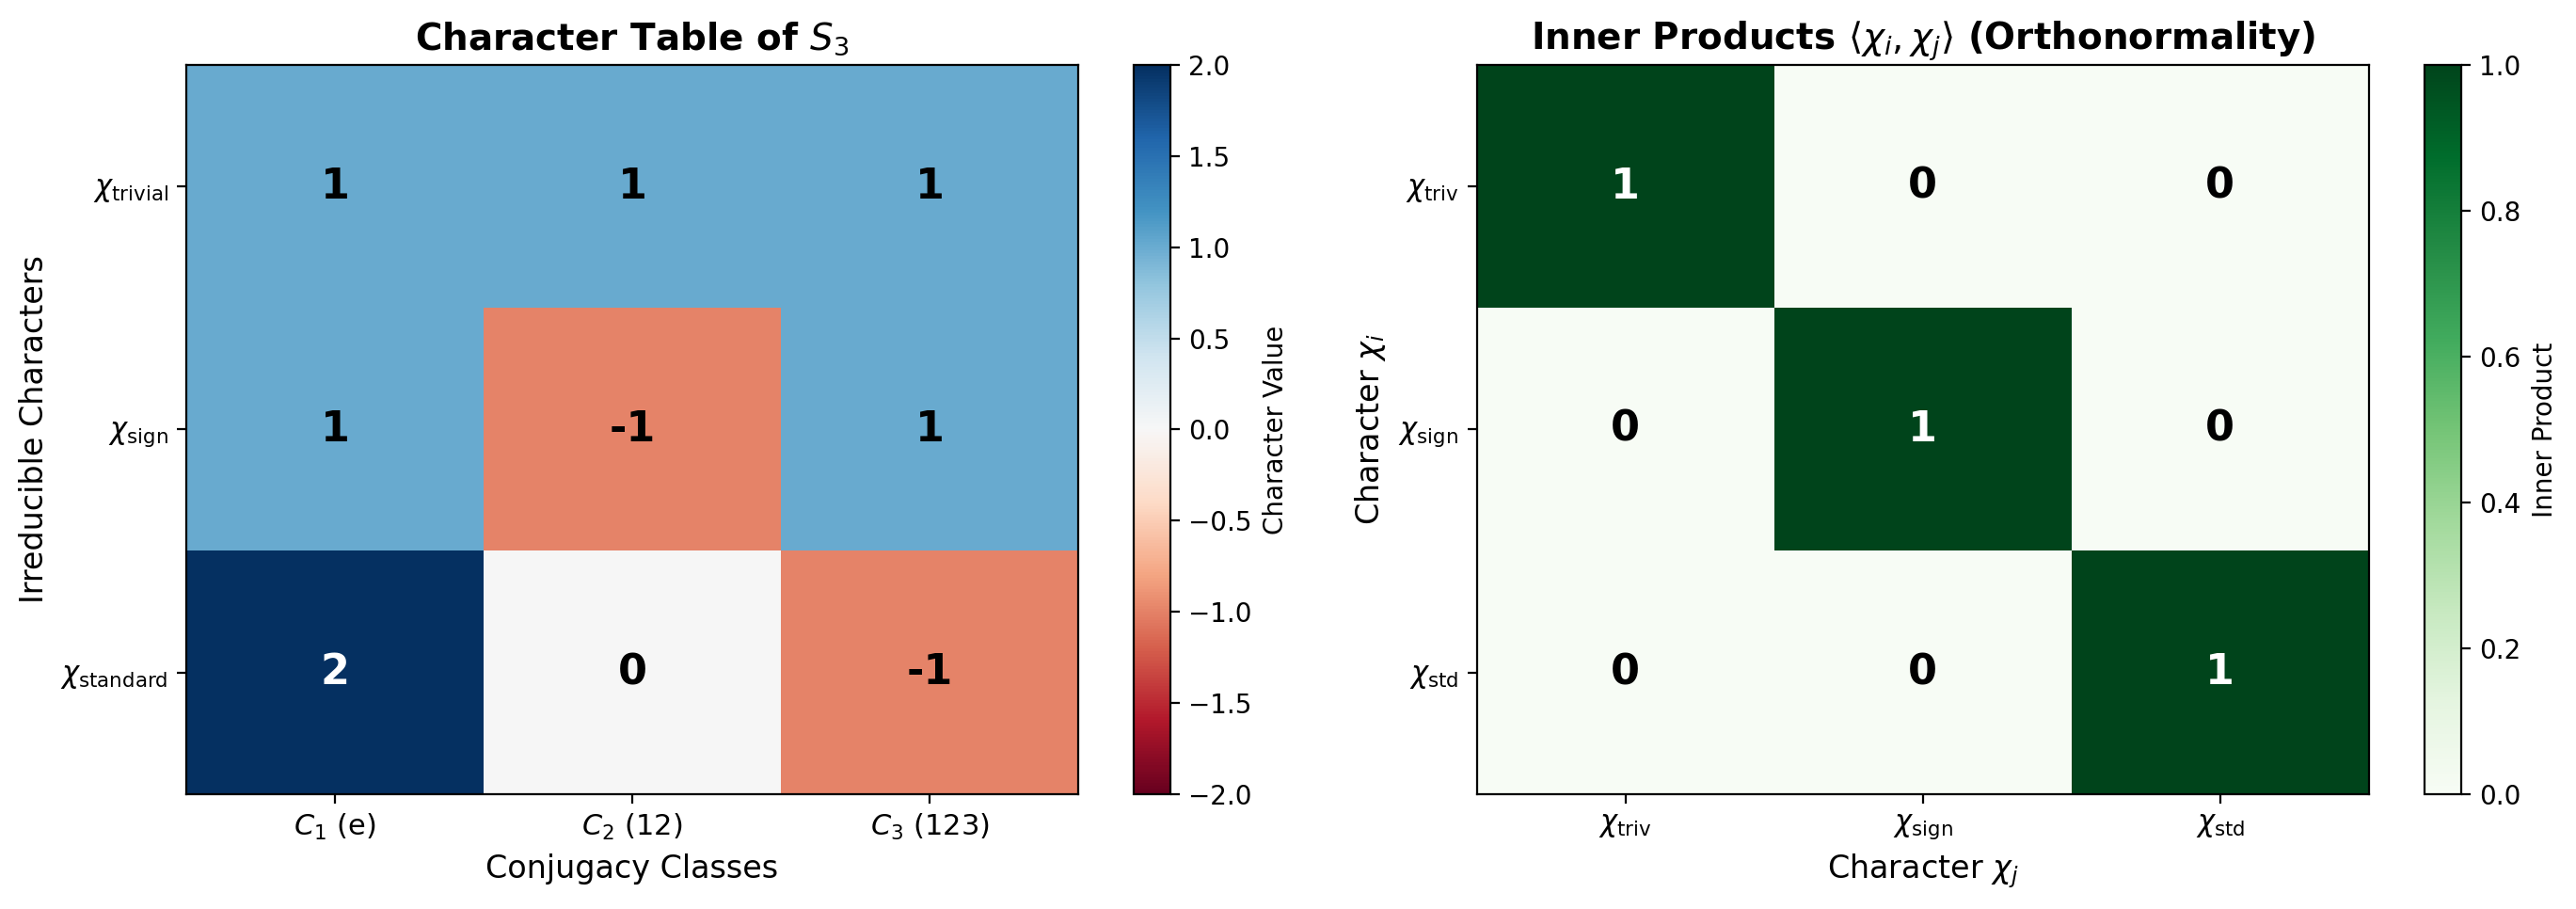


Plot saved to 'plot.png'


In [6]:
# Visualize the character table

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Character table as heatmap
ax1 = axes[0]
im = ax1.imshow(char_table, cmap='RdBu', aspect='auto', vmin=-2, vmax=2)

ax1.set_xticks(range(3))
ax1.set_xticklabels(['$C_1$ (e)', '$C_2$ (12)', '$C_3$ (123)'], fontsize=11)
ax1.set_yticks(range(3))
ax1.set_yticklabels(['$\\chi_{\\mathrm{trivial}}$', '$\\chi_{\\mathrm{sign}}$', '$\\chi_{\\mathrm{standard}}$'], fontsize=11)

ax1.set_xlabel('Conjugacy Classes', fontsize=12)
ax1.set_ylabel('Irreducible Characters', fontsize=12)
ax1.set_title('Character Table of $S_3$', fontsize=14, fontweight='bold')

# Add text annotations
for i in range(3):
    for j in range(3):
        val = int(char_table[i, j])
        color = 'white' if abs(val) > 1 else 'black'
        ax1.text(j, i, str(val), ha='center', va='center', fontsize=16, fontweight='bold', color=color)

plt.colorbar(im, ax=ax1, label='Character Value')

# Right plot: Inner product matrix (showing orthonormality)
ax2 = axes[1]

inner_prod_matrix = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        inner_prod_matrix[i, j] = inner_product(char_table[i], char_table[j], class_sizes, group_order).real

im2 = ax2.imshow(inner_prod_matrix, cmap='Greens', aspect='auto', vmin=0, vmax=1)

ax2.set_xticks(range(3))
ax2.set_xticklabels(['$\\chi_{\\mathrm{triv}}$', '$\\chi_{\\mathrm{sign}}$', '$\\chi_{\\mathrm{std}}$'], fontsize=11)
ax2.set_yticks(range(3))
ax2.set_yticklabels(['$\\chi_{\\mathrm{triv}}$', '$\\chi_{\\mathrm{sign}}$', '$\\chi_{\\mathrm{std}}$'], fontsize=11)

ax2.set_xlabel('Character $\\chi_j$', fontsize=12)
ax2.set_ylabel('Character $\\chi_i$', fontsize=12)
ax2.set_title('Inner Products $\\langle \\chi_i, \\chi_j \\rangle$ (Orthonormality)', fontsize=14, fontweight='bold')

# Add text annotations
for i in range(3):
    for j in range(3):
        val = inner_prod_matrix[i, j]
        color = 'white' if val > 0.5 else 'black'
        ax2.text(j, i, f'{val:.0f}', ha='center', va='center', fontsize=16, fontweight='bold', color=color)

plt.colorbar(im2, ax=ax2, label='Inner Product')

plt.tight_layout()
plt.savefig('character_theory_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## Applications and Significance

### Character Theory Applications

1. **Burnside's Theorem**: The number of orbits under a group action can be computed using:
   $$|X/G| = \frac{1}{|G|} \sum_{g \in G} |X^g|$$
   where $X^g$ is the set of fixed points of $g$.

2. **Decomposition of Representations**: Any representation can be decomposed into irreducibles:
   $$V \cong \bigoplus_{\chi \in \mathrm{Irr}(G)} n_\chi V_\chi, \quad n_\chi = \langle \chi_V, \chi \rangle$$

3. **Molecular Symmetry**: In chemistry, character theory determines which molecular orbitals transform together under symmetry operations.

4. **Fourier Analysis on Groups**: Characters generalize the exponential functions in classical Fourier analysis.

### The Character Table Contains Complete Information

The character table uniquely determines:
- The number of conjugacy classes
- The sizes of conjugacy classes (via orthogonality)
- Whether the group is abelian ($\chi(e) = 1$ for all irreducible $\chi$)
- The center of the group
- All normal subgroups (kernels of characters)

### Connection to Physics

In quantum mechanics, the irreducible representations of symmetry groups classify:
- **Particle types**: Bosons and fermions correspond to symmetric and antisymmetric representations
- **Selection rules**: Transition probabilities between states are determined by how representations combine
- **Degeneracy**: Dimensions of irreducible representations explain energy level degeneracies

## Summary

In this notebook, we have:

1. Introduced the fundamental concepts of **character theory** for finite groups
2. Derived the **conjugacy classes** of the symmetric group $S_3$
3. Constructed the three **irreducible representations** (trivial, sign, standard)
4. Computed the complete **character table** of $S_3$
5. Verified the **orthogonality relations** that make characters so powerful
6. Visualized the character table and demonstrated the orthonormality of irreducible characters

The character table of $S_3$:

| | $e$ | $(12)$ | $(123)$ |
|---|---|---|---|
| $\chi_{\text{triv}}$ | 1 | 1 | 1 |
| $\chi_{\text{sign}}$ | 1 | -1 | 1 |
| $\chi_{\text{std}}$ | 2 | 0 | -1 |

This elegant table encapsulates all essential information about the representation theory of $S_3$, demonstrating the power and beauty of character theory in abstract algebra.